In [3]:
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv('features_data.csv', delimiter=',', decimal='.')
%store -r features_dict

In [5]:
time = data['time']
time_1 = data['time_1']
time_2 = data['time_2']
time_3 = data['time_3']
jerk = data['mean_jerk_vector']
jerk_1 = data['mean_jerk_1_vector']
jerk_2 = data['mean_jerk_2_vector']
jerk_3 = data['mean_jerk_3_vector']
jerk_y = data['mean_jerk_y']
jerk_y_1 = data['mean_jerk_1_y']
jerk_y_2 = data['mean_jerk_2_y']
jerk_y_3 = data['mean_jerk_3_y']
peaks = data['pos_peaks']
peaks_1 = data['pos_peaks_1']
peaks_2 = data['pos_peaks_2']
peaks_3 = data['pos_peaks_3']
grasping_performance = data['grasping_performance']
grasping_exploratory = data['grasping_exploratory']
height = data['height']
level = data['level']
experience = data['experience']
training = data['training']
gender = data['gender']
person_name = data['person_name']

In [6]:
def plotFeatures(feature_x, feature_y, label_x, label_y):
    plt.figure(figsize=(6, 6))
    for i, person in enumerate(person_name):
        features = features_dict[person]
        x = features[feature_x]
        y = features[feature_y]
        gender = features['gender']

        color = 'red' if gender == 'female' else 'blue'
        marker = 'x' if gender == 'female' else '+'
        size = 40 if gender == 'female' else 80
        plt.scatter(x, y, color=color, marker=marker, s=size)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.savefig('Correlation_Plots/eps/' + feature_x + '_' + feature_y + '.eps')
    plt.savefig('Correlation_Plots/jpg/' + feature_x + '_' + feature_y + '.jpg')    

In [17]:
def plotBars(feature, label_x, label_y, path):
    plt.figure(figsize=(6,6))
    colors = ['red' if g == 0 else 'blue' for g in gender]

    for i, person in enumerate(person_name):
        plt.bar(person, feature[i], color=colors[i])
        plt.tick_params(axis='x', rotation=45)
        plt.xlabel(label_x)
        plt.ylabel(label_y)

    plt.savefig(f'Plots/{path}.eps')
    plt.show()

# Plot Bars

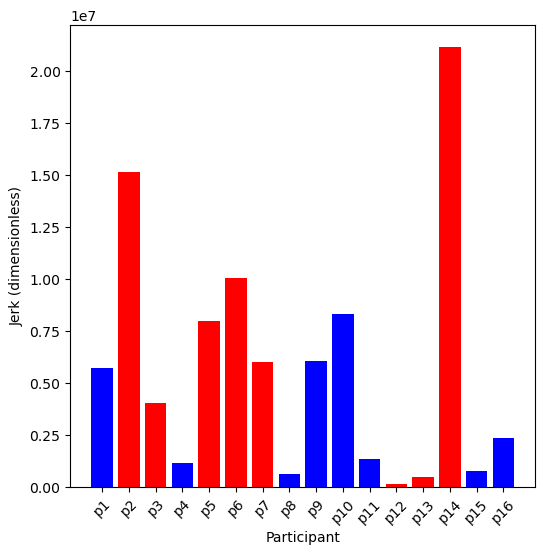

In [14]:
plotBars(jerk_1, 'Participant', 'Jerk (dimensionless)', 'jerk1')

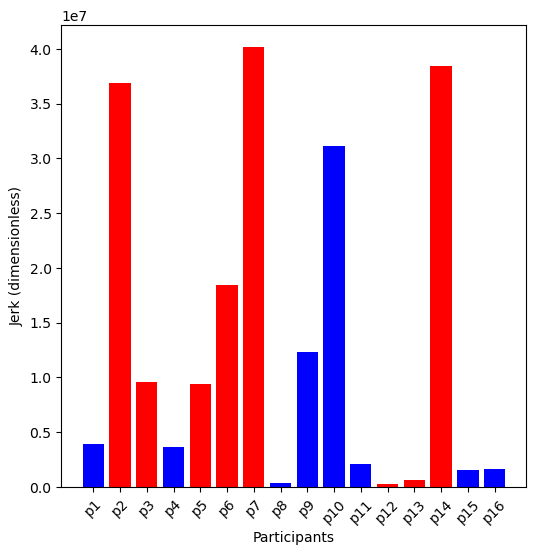

In [15]:
plotBars(jerk_2, 'Participants', 'Jerk (dimensionless)', 'jerk2')

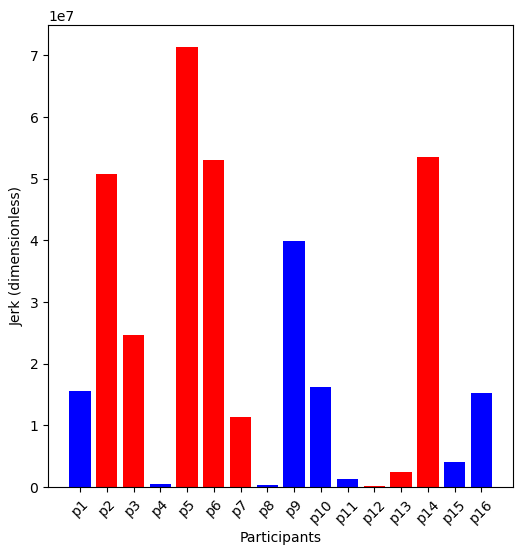

In [16]:
plotBars(jerk_3, 'Participants', 'Jerk (dimensionless)', 'jerk3')

# Plot Correlation

0
1
2
3
4
5
6
7
8
9
10
11


IndexError: string index out of range

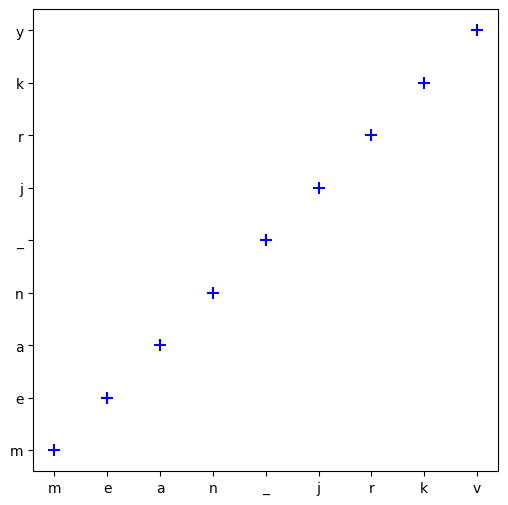

In [40]:
plotFeatures('mean_jerk_vector', 'mean_jerk_y', 'Jerk vector (dimensionless)', 'Jerk y (dimensionless)', 'jerk_v_y')

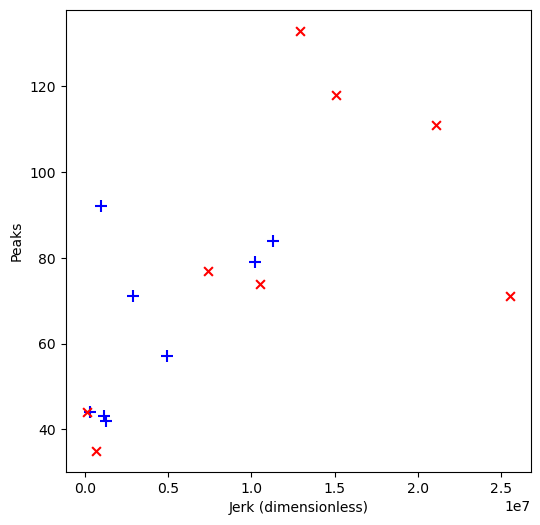

In [ ]:
plotFeatures('mean_jerk_vector', 'pos_peaks', 'Jerk (dimensionless)', 'Peaks')

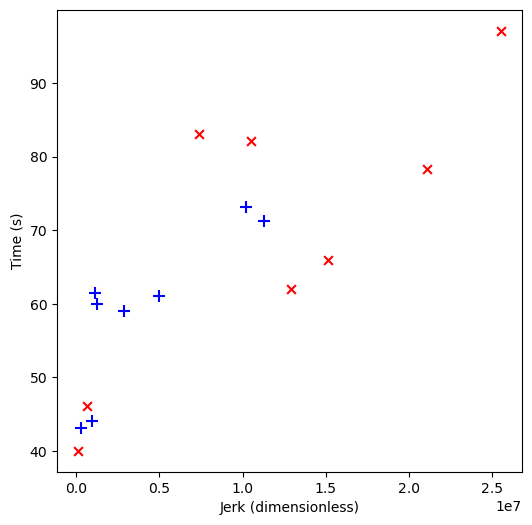

In [ ]:
plotFeatures('mean_jerk_vector', 'time', 'Jerk (dimensionless)', 'Time (s)')

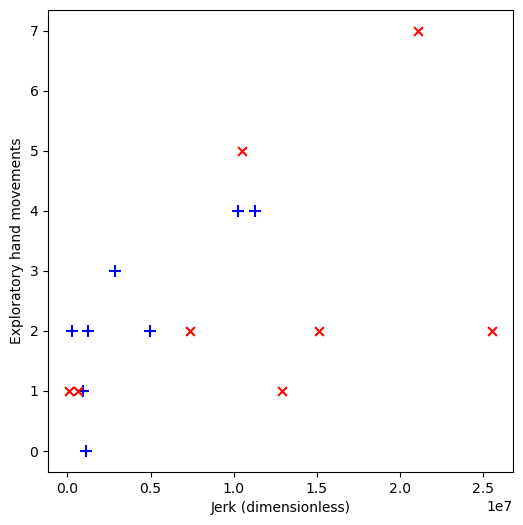

In [ ]:
plotFeatures('mean_jerk_vector', 'grasping_exploratory', 'Jerk (dimensionless)', 'Exploratory hand movements')

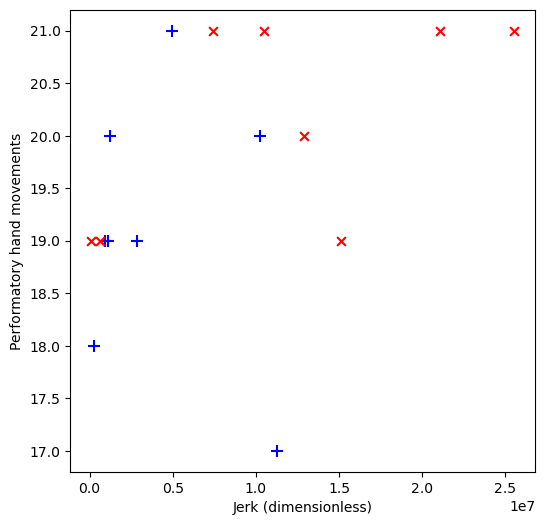

In [ ]:
plotFeatures('mean_jerk_vector', 'grasping_performance', 'Jerk (dimensionless)', 'Performatory hand movements')

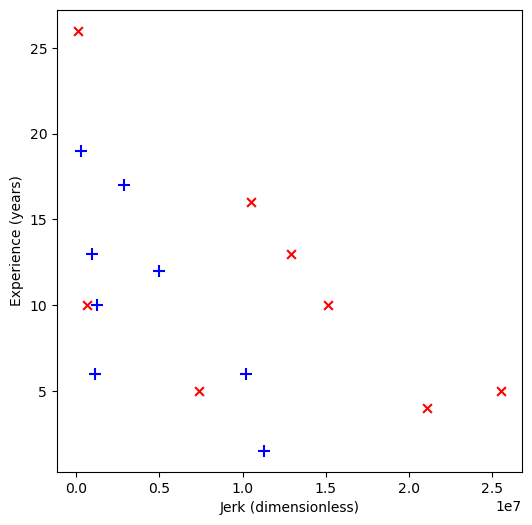

In [ ]:
plotFeatures('mean_jerk_vector', 'experience', 'Jerk (dimensionless)', 'Experience (years)')

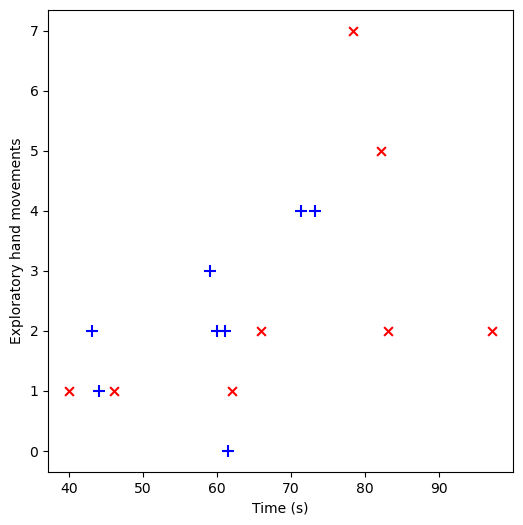

In [ ]:
plotFeatures('time', 'grasping_exploratory', 'Time (s)', 'Exploratory hand movements')

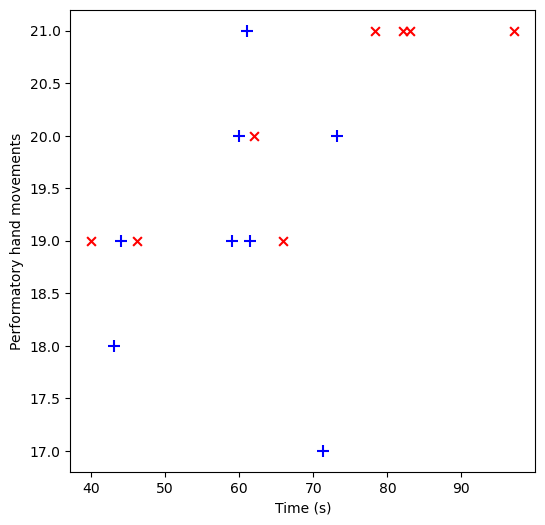

In [ ]:
plotFeatures('time', 'grasping_performance', 'Time (s)', 'Performatory hand movements')

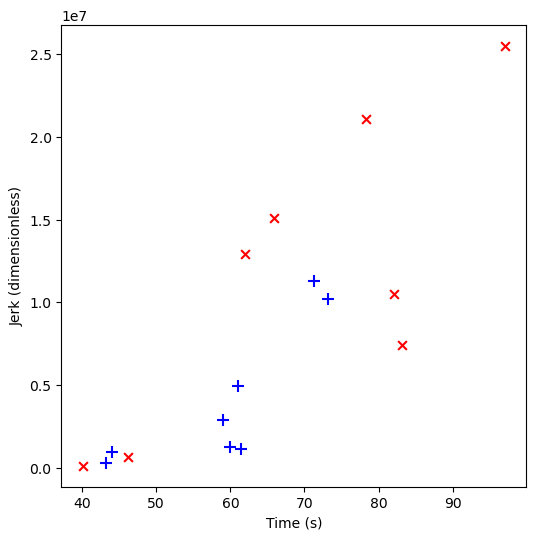

In [ ]:
plotFeatures('time', 'mean_jerk_vector', 'Time (s)', 'Jerk (dimensionless)')

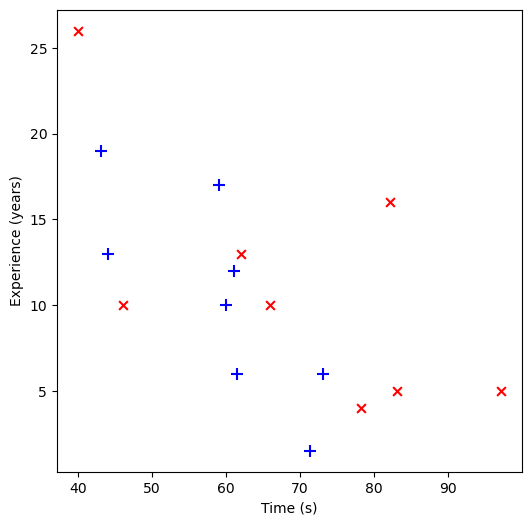

In [ ]:
plotFeatures('time', 'experience', 'Time (s)', 'Experience (years)')

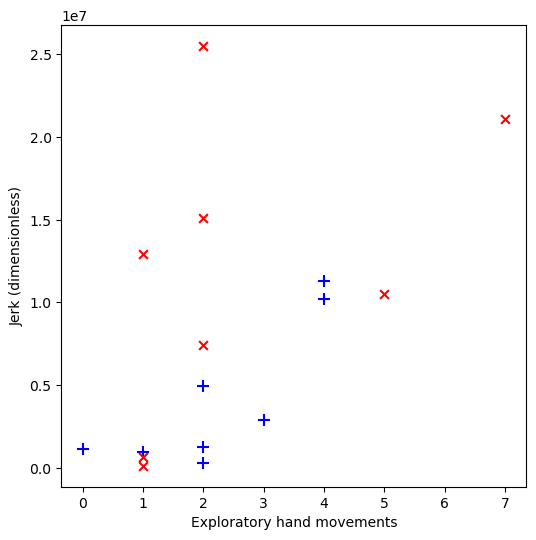

In [ ]:
plotFeatures('grasping_exploratory', 'mean_jerk_vector', 'Exploratory hand movements', 'Jerk (dimensionless)')

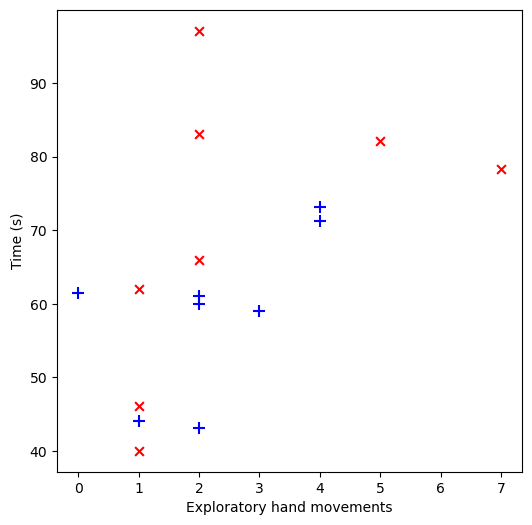

In [ ]:
plotFeatures('grasping_exploratory', 'time', 'Exploratory hand movements', 'Time (s)')

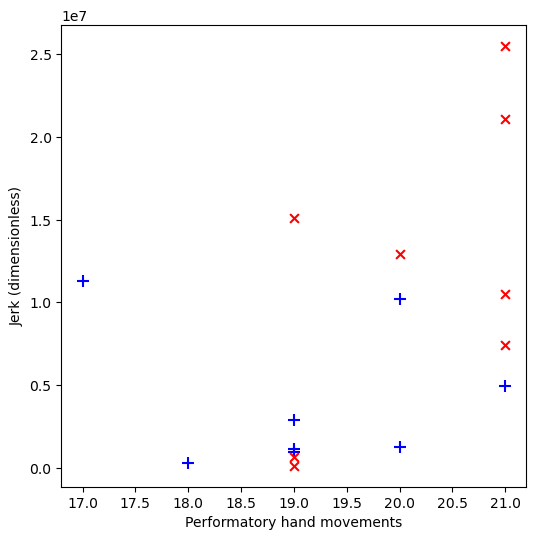

In [ ]:
plotFeatures('grasping_performance', 'mean_jerk_vector', 'Performatory hand movements', 'Jerk (dimensionless)')

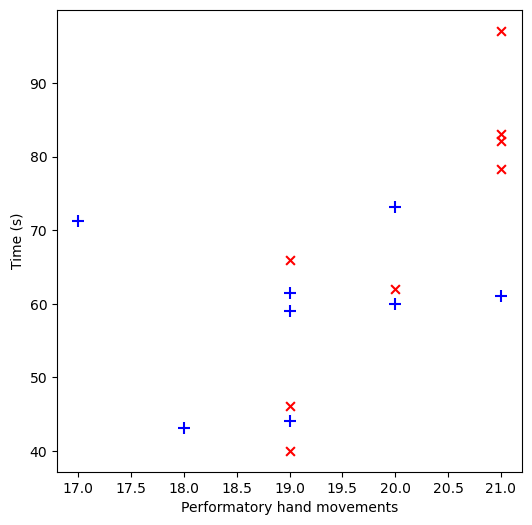

In [ ]:
plotFeatures('grasping_performance', 'time', 'Performatory hand movements', 'Time (s)')

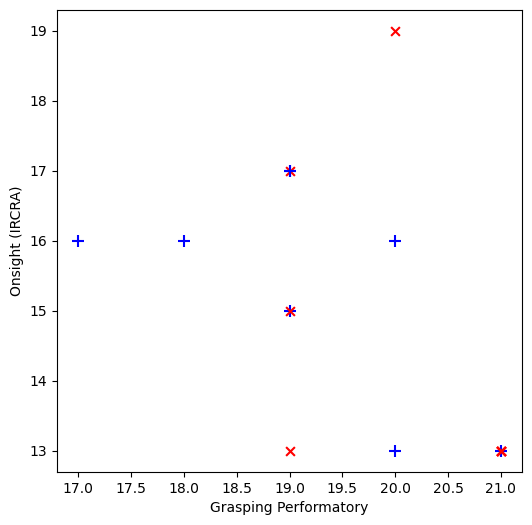

In [ ]:
plotFeatures('grasping_performance', 'level', 'Grasping Performatory', 'Onsight (IRCRA)')

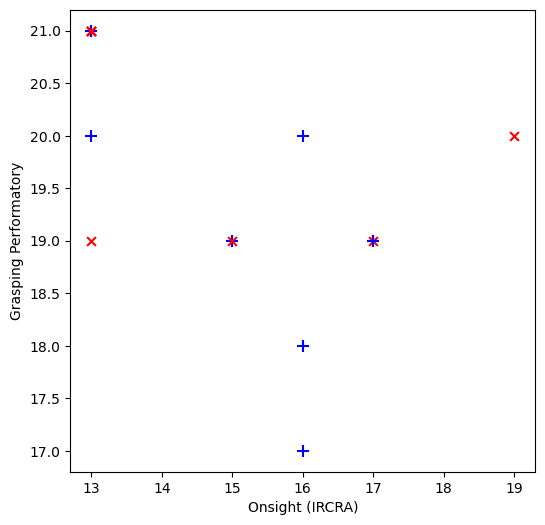

In [ ]:
plotFeatures('level', 'grasping_performance', 'Onsight (IRCRA)', 'Grasping Performatory')

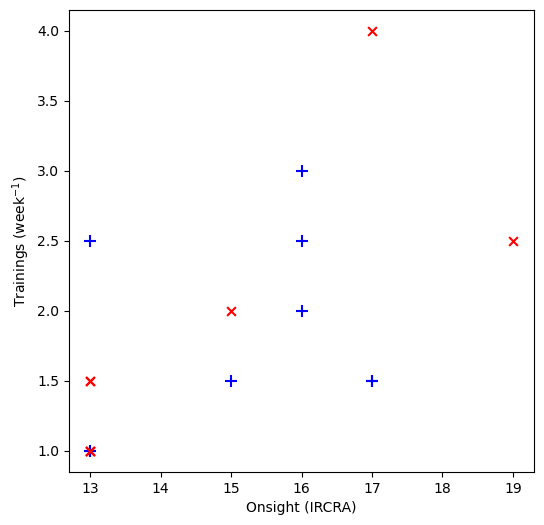

In [ ]:
plotFeatures('level', 'training', 'Onsight (IRCRA)', 'Trainings (week$^{-1}$)')

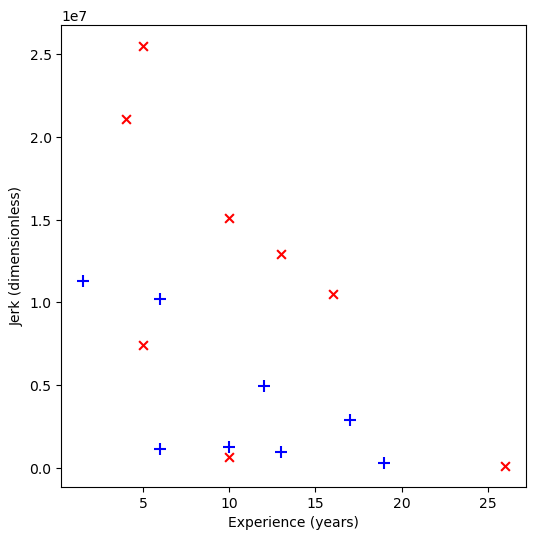

In [ ]:
plotFeatures('experience', 'mean_jerk_vector', 'Experience (years)', 'Jerk (dimensionless)')

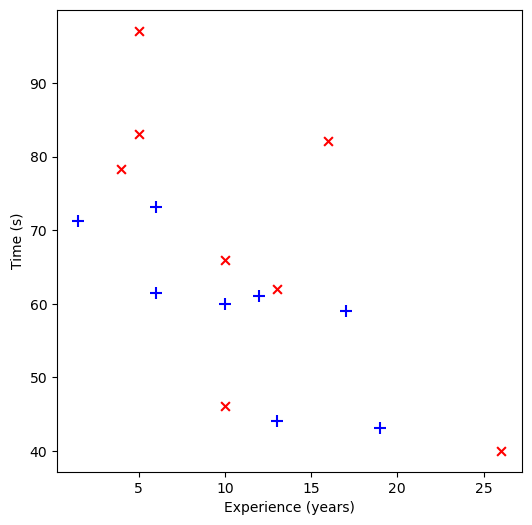

In [ ]:
plotFeatures('experience', 'time', 'Experience (years)', 'Time (s)')

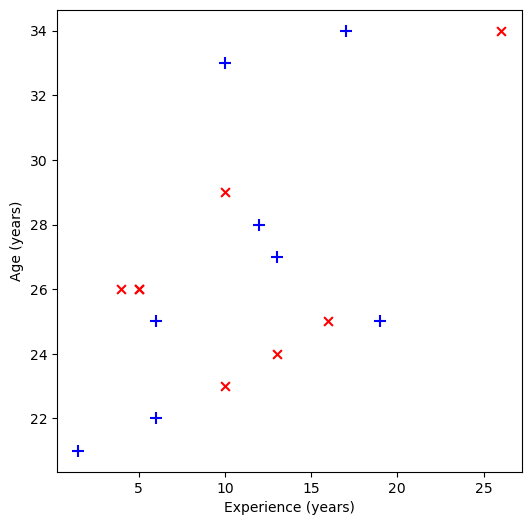

In [ ]:
plotFeatures('experience', 'age', 'Experience (years)', 'Age (years)')